# DESAFIO MODELO PROPERATTI

In [20]:
import Util as utl
import pandas as pd
import numpy as np

#### SE PONEN NULLABLE LOS OUTLIERS Y SON IMPUTADOS

In [21]:
#data = pd.read_csv('/home/DS-DH/notebooks/digitalHouse/properatti.csv')
#data = utl.limpiarDatos(data,0.55)
data = pd.read_csv('/home/DS-DH/notebooks/digitalHouse/data.csv',sep='|')
#data.to_csv('/home/DS-DH/notebooks/digitalHouse/data.csv',sep='|')
matriz = utl.GenerarMatriz(data)

#### SE GENERAN LAS DUMMYS PARA EL MODELO

In [22]:
modeloMatriz = utl.generarDummies(matriz)
#modeloMatriz=modeloMatriz[(modeloMatriz.superficie_total>20) & (modeloMatriz.superficie_total<900)]
#modeloMatriz=modeloMatriz[(modeloMatriz.precio_m2>20) & (modeloMatriz.precio_m2<8000)]
#modeloMatriz.describe()

#### Regresion Lineal Multiple

/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:151: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  xs = xs.as_matrix()
/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:153: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


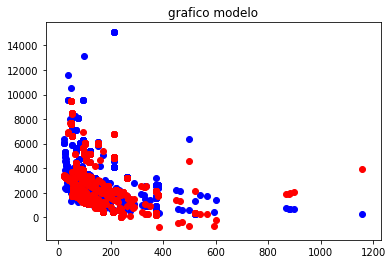

CROSS VALIDATION: 0.8813307613525665 0.8924658444812977 0.9059817227417482 0.8865030648661816 0.8867812730429937
MAE: 215.67667506505694
MSE: 282119.60233494814
RMSE: 531.1493220695553
EL R2 TRAIN ES DE:  0.8934503889700033
EL R2 TEST ES DE:  0.8759929460228693


In [23]:
modelo = utl.modelo_regresion_lineal(modeloMatriz)

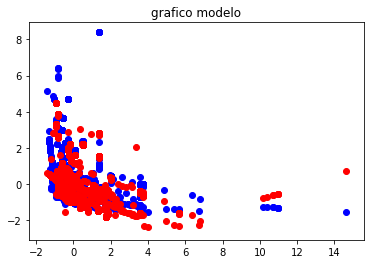

CROSS VALIDATION: 0.880202226954564 0.8795162216686523 0.8944493300592985 0.890101962924258 0.9007856312653687
MAE: 0.1448452139883226
MSE: 0.11222355510232608
RMSE: 0.3349978434293661
EL R2 TRAIN ES DE:  0.8905722301629577
EL R2 TEST ES DE:  0.8877764448976739


In [24]:
modelo = utl.modelo_regresion_lineal_normalizar_antes(modeloMatriz)

####  Ridge Regression

/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:59: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  xs = xs.as_matrix()
/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:60: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


REGULARIZACION CON RIDGE
CROSS VALIDATION: 0.8926979388893342 0.872152520234098 0.8885607428740342 0.8911913048727187 0.88411559496197
MAE RIDGE: 215.46243175808752
MSE RIDGE: 247945.3614546358
RMSE RIDGE: 497.9411224779851
RIDGE -> R2 TRAIN:  0.887109550929627
RIDGE -> R2 TEST:  0.8894949717555692


(5553.092686705646,
 array([-1.26385856e+01, -4.22305453e+01, -3.66745773e+01, -2.27026097e+01,
         4.27821647e+00, -1.37570174e+01, -4.95212305e+01, -4.56775159e+01,
        -9.36624437e+01, -7.38884154e+01, -1.93210491e+02, -3.09061300e+01,
        -1.70459808e+03, -1.75167666e+03, -1.35037027e+03, -1.28824023e+03,
         2.31655127e+02, -4.25552403e+02,  6.67977124e+02, -9.61061634e+02,
         3.43685012e+03,  9.05115352e+02, -7.62774706e+02, -7.03413052e+02,
         1.14630868e+03, -2.25560009e+02, -7.80379163e+02,  1.25698569e+02,
        -6.67865553e+02, -3.71232693e+02,  2.56458269e+02, -9.93125825e+02,
         8.99605449e+02, -8.14196798e+02, -7.46500500e+02,  3.89924456e+03,
        -1.34482599e+03, -9.08895938e+02, -1.21738389e+03, -4.39583598e+02,
        -1.22403036e+03, -2.54102121e+03, -1.33976142e+03, -1.16678883e+03,
        -6.98397524e+02, -9.86583622e+02, -4.26377432e+02,  2.66048795e+03,
        -7.17144124e+02, -8.05895961e+02, -1.13178537e+03, -8.545376

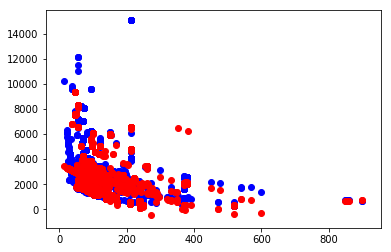

In [25]:
modelo_ridge = utl.modelo_ridge_cross_validation(modeloMatriz)
(modelo_ridge.intercept_,modelo_ridge.coef_)

#### Lasso Regression

/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  xs = xs.as_matrix()
/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


LASSO REGRESSION
CROSS VALIDATION: 0.9031701190629257 0.8897271592947597 0.880315778614385 0.8938777634109196 0.8874717539264482
MAE LASSO: 214.51882941735064
MSE LASSO: 267155.649810228
RMSE LASSO: 516.8710185435318
LASSO -> R2 TRAIN:  0.8915945299224713
LASSO -> R2 TEST:  0.8862905699575279


(5099.132341722334,
 array([-1.52935015e+01,  9.01829109e+01,  0.00000000e+00, -1.01662547e+02,
         1.43522413e+01, -7.15102909e+00, -4.06607800e+01, -2.56677043e+01,
        -3.11459538e+01, -2.51925008e+01, -0.00000000e+00, -1.49574569e+01,
        -1.76249431e+03, -1.80972497e+03, -5.04677859e+02, -5.96603240e+02,
         1.00469101e+03, -4.86360637e+02,  1.40342118e+03, -2.31415987e+02,
         4.09709362e+03,  1.54187480e+03, -1.03475689e+02,  0.00000000e+00,
         1.81644537e+03,  3.65285031e+02, -6.98269626e+01,  1.19092044e+03,
         2.78238904e+01, -3.58279414e+02,  1.01276581e+03, -1.96591684e+02,
         1.67263750e+03, -1.45941885e+02, -7.99226592e+01,  4.76550096e+03,
        -6.81808760e+02, -1.90118564e+02, -1.16480285e+03,  2.09637269e+02,
        -4.34700895e+02, -1.70432782e+03, -4.32286708e+02, -4.41219379e+02,
         3.69719063e+02, -1.20180295e+02,  2.03216708e+02,  2.74592012e+03,
        -3.89643230e+01, -4.73725235e+01, -4.44064125e+02,  6.785118

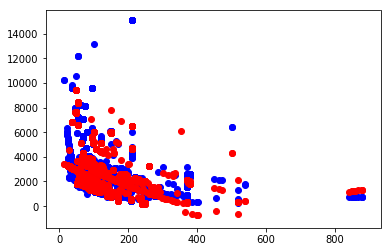

In [26]:
modelo_lasso = utl.modelo_lasso_cross_validation(modeloMatriz)
(modelo_lasso.intercept_,modelo_lasso.coef_)

## PARAMETROS A PREDECIR
###### PARA LA PREDICCION DE PRECIOS POR M2 DE ALQUILERES EN CAPITAL FEDERAL
## NORMALIZAR O NO.. DEPENDE EL MODELO A USAR

In [35]:
SUPERFICIE_TOTAL = 150           ##  [0,600]
JARDIN = '0'                      ##  0,1
TERRAZA = '1'                     ##  0,1
CANTIDAD_DE_AMBIENTES = '2'       ##  1,2,3,4,4,5,6,7
TIPO_DE_PROPIEDAD = 'CASA'        ##  CASA, PH, DTO
BARRIO = 'flores'               ##  barrios de CABA, en minusculas

nuevos_Feactures = utl.nuevosDatos(modeloMatriz, SUPERFICIE_TOTAL, JARDIN, TERRAZA, CANTIDAD_DE_AMBIENTES, TIPO_DE_PROPIEDAD, BARRIO)
y_predict = modelo_lasso.predict(nuevos_Feactures)

'EL RESULTADO DEL MODELO PARA LAS VARIABLES INGRESADAS ES DE {} U$D POR M2'.format(y_predict[0].astype(int))


/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:357: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  predecir_data.superficie_total_2 = predecir_data.superficie_total**2


'EL RESULTADO DEL MODELO PARA LAS VARIABLES INGRESADAS ES DE 2551 U$D POR M2'